# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [144]:
#Alumno: Mamani Acha Alvin Jairo.
#Carrera: Ing. De Sistemas.
#---------------------------------------------------------------------------------
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Pandas
import pandas as pd

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un paciente tiene calculos renales en funcion del analisis de orina. Para cada ejemplo de capacitación, se tiene los resultados del analisis de orina y si fue detectado con caluclos renales o no. Su tarea es crear un modelo de clasificación que calcule la probabilidad de que un paciente tenga calculos renales.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [145]:
datos = pd.read_csv(os.path.join('Datasets', 'card_transdata.csv'), delimiter=',', header = 0)
datos

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [146]:
data = np.asarray(datos)
print(data)

[[57.87785658  0.31114001  1.94593998 ...  0.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881 ...  0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456 ...  0.          1.
   0.        ]
 ...
 [ 2.91485699  1.47268669  0.21807549 ...  0.          1.
   0.        ]
 [ 4.25872939  0.24202337  0.47582206 ...  0.          1.
   0.        ]
 [58.10812496  0.31811012  0.38691985 ...  0.          1.
   0.        ]]


In [147]:
# Cargar datos
# Las primeras seis columnas contienen los resultados del analisis de orina y la septima columna
# contiene la etiqueta que indica si el paciente fue detectado con calculos renales o no.

#data = np.loadtxt(os.path.join('Dataset', 'kindey stone urine analysis.csv'), delimiter=',')
X, y = data[:, 0:7], data[:, 7]
print(X)
print(y)

[[57.87785658  0.31114001  1.94593998 ...  1.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881 ...  0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456 ...  0.          0.
   1.        ]
 ...
 [ 2.91485699  1.47268669  0.21807549 ...  1.          0.
   1.        ]
 [ 4.25872939  0.24202337  0.47582206 ...  0.          0.
   1.        ]
 [58.10812496  0.31811012  0.38691985 ...  1.          0.
   1.        ]]
[0. 0. 0. ... 0. 0. 0.]


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como: 

$$ g(z) = \frac{1}{1+e^{-z}}$$

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [148]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [149]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X. 

In [150]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[ 1.          5.58640767 13.26107327  0.06476847  1.          0.
  0.          0.        ]


La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [151]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [152]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.01580651 -0.01535507 -0.01838447 -0.01009663 -0.01350404 -0.00594305
 -0.00201657 -0.00898209]
****************************************************************************************************
El paciente tiene  0.07820870160569371 de probabilidad de sufrir una estafa.
****************************************************************************************************
El paciente tiene  0.4627293764878125 de probabilidad de sufrir una estafa.


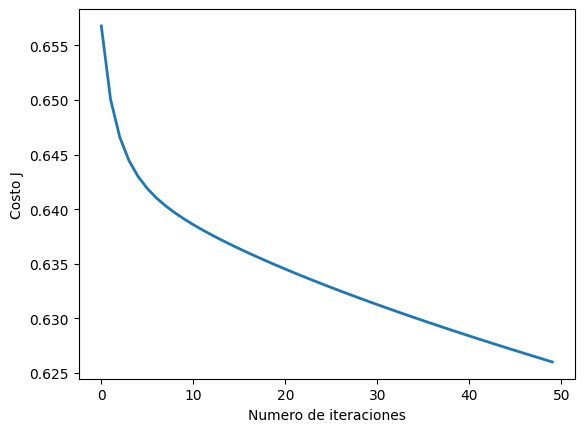

In [153]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 50

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si el paciente tiene calculos renales o no:
# Prueba 1:
X_array = [1,155.01703467629554,2.380886466632241,0.4532678582913869,1.0,0.0,0.0,1.0]
aprueba = sigmoid(np.dot(X_array, theta)) 
print('*'*100)
print('El paciente tiene ',aprueba,'de probabilidad de sufrir una estafa.')
# Prueba 2:
X_array = [1,5.493689314972278,0.6509877310797505,1.4601756176737808,1.0,0.0,0.0,1.0]
aprueba = sigmoid(np.dot(X_array, theta)) 
print('*'*100) 
print('El paciente tiene ',aprueba,'de probabilidad de sufrir una estafa.')

In [154]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [155]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print('Valores de theta: ',initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
#print('Costo esperado (aproximado): 0.693\n')
#print(grad)
print('Gradiente en theta inicial (zeros):')
print(grad)
#print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))
#print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



Valores de theta:  [0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Gradiente en theta inicial (zeros):
[0.412597   7.52290932 1.40717658 0.3871203  0.363843   0.1527895
 0.050031   0.242565  ]


In [156]:
# Establecer las opciones para optimize.minimize
#options= {'maxiter': 2000}
options= {'maxfun':500}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuelve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
#print('Costo esperado (aproximado): 0.203\n')

print('theta:')
print(theta)
#print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))
#print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

C:\Users\admin\AppData\Local\Temp\ipykernel_5844\749613239.py:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


Costo con un valor de theta encontrado por optimize.minimize: 0.631
theta:
[-0.01148091 -0.01998793 -0.03199944 -0.00973126 -0.00999749 -0.00427527
 -0.00141763 -0.00667788]


<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un paciente tiene calculos renales. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento. 

In [157]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [158]:
#  Predice la probabilidad de un paciente de tener calculos renales:
print('Prediccion 1:')
prob = sigmoid(np.dot([1,155.01703467629554,2.380886466632241,0.4532678582913869,1.0,0.0,0.0,1.0], theta))
#print(theta)
print('El paciente tiene un : {:.3f}%, de sufrir una estafa'.format(prob))
#print('Valor esperado: 0.775 +/- 0.002\n')
print('*'*100)

print('Prediccion 2:')
prob = sigmoid(np.dot([1,5.493689314972278,0.6509877310797505,1.4601756176737808,1.0,0.0,0.0,1.0], theta))
print('El paciente tiene un : {:.3f}%, de sufrir una estafa'.format(prob))
print('*'*100)

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
#print('Precisión esperada (aproximadamente): 89.00 %')

Prediccion 1:
El paciente tiene un : 0.039%, de sufrir una estafa
****************************************************************************************************
Prediccion 2:
El paciente tiene un : 0.457%, de sufrir una estafa
****************************************************************************************************
Precisión de entrenamiento: 91.26 %
